In [4]:
import ember
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [6]:
import confusion_matrix_pretty_print as cmpp

In [7]:
data_dir = '../subset/'

In [8]:
labels = ['h0', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24', 'h25', 'h26', 'h27', 'h28', 'h29', 'h30', 'h31', 'h32', 'h33', 'h34', 'h35', 'h36', 'h37', 'h38', 'h39', 'h40', 'h41', 'h42', 'h43', 'h44', 'h45', 'h46', 'h47', 'h48', 'h49', 'h50', 'h51', 'h52', 'h53', 'h54', 'h55', 'h56', 'h57', 'h58', 'h59', 'h60', 'h61', 'h62', 'h63', 'h64', 'h65', 'h66', 'h67', 'h68', 'h69', 'h70', 'h71', 'h72', 'h73', 'h74', 'h75', 'h76', 'h77', 'h78', 'h79', 'h80', 'h81', 'h82', 'h83', 'h84', 'h85', 'h86', 'h87', 'h88', 'h89', 'h90', 'h91', 'h92', 'h93', 'h94', 'h95', 'h96', 'h97', 'h98', 'h99', 'h100', 'h101', 'h102', 'h103', 'h104', 'h105', 'h106', 'h107', 'h108', 'h109', 'h110', 'h111', 'h112', 'h113', 'h114', 'h115', 'h116', 'h117', 'h118', 'h119', 'h120', 'h121', 'h122', 'h123', 'h124', 'h125', 'h126', 'h127', 'h128', 'h129', 'h130', 'h131', 'h132', 'h133', 'h134', 'h135', 'h136', 'h137', 'h138', 'h139', 'h140', 'h141', 'h142', 'h143', 'h144', 'h145', 'h146', 'h147', 'h148', 'h149', 'h150', 'h151', 'h152', 'h153', 'h154', 'h155', 'h156', 'h157', 'h158', 'h159', 'h160', 'h161', 'h162', 'h163', 'h164', 'h165', 'h166', 'h167', 'h168', 'h169', 'h170', 'h171', 'h172', 'h173', 'h174', 'h175', 'h176', 'h177', 'h178', 'h179', 'h180', 'h181', 'h182', 'h183', 'h184', 'h185', 'h186', 'h187', 'h188', 'h189', 'h190', 'h191', 'h192', 'h193', 'h194', 'h195', 'h196', 'h197', 'h198', 'h199', 'h200', 'h201', 'h202', 'h203', 'h204', 'h205', 'h206', 'h207', 'h208', 'h209', 'h210', 'h211', 'h212', 'h213', 'h214', 'h215', 'h216', 'h217', 'h218', 'h219', 'h220', 'h221', 'h222', 'h223', 'h224', 'h225', 'h226', 'h227', 'h228', 'h229', 'h230', 'h231', 'h232', 'h233', 'h234', 'h235', 'h236', 'h237', 'h238', 'h239', 'h240', 'h241', 'h242', 'h243', 'h244', 'h245', 'h246', 'h247', 'h248', 'h249', 'h250', 'h251', 'h252', 'h253', 'h254', 'h255', 'be0', 'be1', 'be2', 'be3', 'be4', 'be5', 'be6', 'be7', 'be8', 'be9', 'be10', 'be11', 'be12', 'be13', 'be14', 'be15', 'be16', 'be17', 'be18', 'be19', 'be20', 'be21', 'be22', 'be23', 'be24', 'be25', 'be26', 'be27', 'be28', 'be29', 'be30', 'be31', 'be32', 'be33', 'be34', 'be35', 'be36', 'be37', 'be38', 'be39', 'be40', 'be41', 'be42', 'be43', 'be44', 'be45', 'be46', 'be47', 'be48', 'be49', 'be50', 'be51', 'be52', 'be53', 'be54', 'be55', 'be56', 'be57', 'be58', 'be59', 'be60', 'be61', 'be62', 'be63', 'be64', 'be65', 'be66', 'be67', 'be68', 'be69', 'be70', 'be71', 'be72', 'be73', 'be74', 'be75', 'be76', 'be77', 'be78', 'be79', 'be80', 'be81', 'be82', 'be83', 'be84', 'be85', 'be86', 'be87', 'be88', 'be89', 'be90', 'be91', 'be92', 'be93', 'be94', 'be95', 'be96', 'be97', 'be98', 'be99', 'be100', 'be101', 'be102', 'be103', 'be104', 'be105', 'be106', 'be107', 'be108', 'be109', 'be110', 'be111', 'be112', 'be113', 'be114', 'be115', 'be116', 'be117', 'be118', 'be119', 'be120', 'be121', 'be122', 'be123', 'be124', 'be125', 'be126', 'be127', 'be128', 'be129', 'be130', 'be131', 'be132', 'be133', 'be134', 'be135', 'be136', 'be137', 'be138', 'be139', 'be140', 'be141', 'be142', 'be143', 'be144', 'be145', 'be146', 'be147', 'be148', 'be149', 'be150', 'be151', 'be152', 'be153', 'be154', 'be155', 'be156', 'be157', 'be158', 'be159', 'be160', 'be161', 'be162', 'be163', 'be164', 'be165', 'be166', 'be167', 'be168', 'be169', 'be170', 'be171', 'be172', 'be173', 'be174', 'be175', 'be176', 'be177', 'be178', 'be179', 'be180', 'be181', 'be182', 'be183', 'be184', 'be185', 'be186', 'be187', 'be188', 'be189', 'be190', 'be191', 'be192', 'be193', 'be194', 'be195', 'be196', 'be197', 'be198', 'be199', 'be200', 'be201', 'be202', 'be203', 'be204', 'be205', 'be206', 'be207', 'be208', 'be209', 'be210', 'be211', 'be212', 'be213', 'be214', 'be215', 'be216', 'be217', 'be218', 'be219', 'be220', 'be221', 'be222', 'be223', 'be224', 'be225', 'be226', 'be227', 'be228', 'be229', 'be230', 'be231', 'be232', 'be233', 'be234', 'be235', 'be236', 'be237', 'be238', 'be239', 'be240', 'be241', 'be242', 'be243', 'be244', 'be245', 'be246', 'be247', 'be248', 'be249', 'be250', 'be251', 'be252', 'be253', 'be254', 'be255', 'numstrings', 'avlength', 'prntdist1', 'prntdist2', 'prntdist3', 'prntdist4', 'prntdist5', 'prntdist6', 'prntdist7', 'prntdist8', 'prntdist9', 'prntdist10', 'prntdist11', 'prntdist12', 'prntdist13', 'prntdist14', 'prntdist15', 'prntdist16', 'prntdist17', 'prntdist18', 'prntdist19', 'prntdist20', 'prntdist21', 'prntdist22', 'prntdist23', 'prntdist24', 'prntdist25', 'prntdist26', 'prntdist27', 'prntdist28', 'prntdist29', 'prntdist30', 'prntdist31', 'prntdist32', 'prntdist33', 'prntdist34', 'prntdist35', 'prntdist36', 'prntdist37', 'prntdist38', 'prntdist39', 'prntdist40', 'prntdist41', 'prntdist42', 'prntdist43', 'prntdist44', 'prntdist45', 'prntdist46', 'prntdist47', 'prntdist48', 'prntdist49', 'prntdist50', 'prntdist51', 'prntdist52', 'prntdist53', 'prntdist54', 'prntdist55', 'prntdist56', 'prntdist57', 'prntdist58', 'prntdist59', 'prntdist60', 'prntdist61', 'prntdist62', 'prntdist63', 'prntdist64', 'prntdist65', 'prntdist66', 'prntdist67', 'prntdist68', 'prntdist69', 'prntdist70', 'prntdist71', 'prntdist72', 'prntdist73', 'prntdist74', 'prntdist75', 'prntdist76', 'prntdist77', 'prntdist78', 'prntdist79', 'prntdist80', 'prntdist81', 'prntdist82', 'prntdist83', 'prntdist84', 'prntdist85', 'prntdist86', 'prntdist87', 'prntdist88', 'prntdist89', 'prntdist90', 'prntdist91', 'prntdist92', 'prntdist93', 'prntdist94', 'prntdist95', 'prntdist96', 'printables', 'entropy', 'paths', 'urls', 'registry', 'MZ', 'size', 'vsize', 'has_debug', 'exports', 'imports', 'has_reloc', 'has_resources', 'has_sig', 'has_tls', 'symbols', 'timestamp', 'mchne1', 'mchne2', 'mchne3', 'mchne4', 'mchne5', 'mchne6', 'mchne7', 'mchne8', 'mchne9', 'mchne10', 'charistics1', 'charistics2', 'charistics3', 'charistics4', 'charistics5', 'charistics6', 'charistics7', 'charistics8', 'charistics9', 'charistics10', 'subsys1', 'subsys2', 'subsys3', 'subsys4', 'subsys5', 'subsys6', 'subsys7', 'subsys8', 'subsys9', 'subsys10', 'dlls1', 'dlls2', 'dlls3', 'dlls4', 'dlls5', 'dlls6', 'dlls7', 'dlls8', 'dlls9', 'dlls10', 'magic1', 'magic2', 'magic3', 'magic4', 'magic5', 'magic6', 'magic7', 'magic8', 'magic9', 'magic10', 'maj_img_ver', 'min_img_ver', 'maj_lnk_ver', 'min_lnk_ver', 'maj_os_ver', 'min_os_ver', 'maj_subsys_ver', 'min_subsys_ver', 'size_code', 'size_hdrs', 'size_heap_commit', 'num_sections', 'num_sections_nonzero', 'num_sections_noname', 'num_sections_RX', 'num_sections_W', 'sect_sz_hash1', 'sect_sz_hash2', 'sect_sz_hash3', 'sect_sz_hash4', 'sect_sz_hash5', 'sect_sz_hash6', 'sect_sz_hash7', 'sect_sz_hash8', 'sect_sz_hash9', 'sect_sz_hash10', 'sect_sz_hash11', 'sect_sz_hash12', 'sect_sz_hash13', 'sect_sz_hash14', 'sect_sz_hash15', 'sect_sz_hash16', 'sect_sz_hash17', 'sect_sz_hash18', 'sect_sz_hash19', 'sect_sz_hash20', 'sect_sz_hash21', 'sect_sz_hash22', 'sect_sz_hash23', 'sect_sz_hash24', 'sect_sz_hash25', 'sect_sz_hash26', 'sect_sz_hash27', 'sect_sz_hash28', 'sect_sz_hash29', 'sect_sz_hash30', 'sect_sz_hash31', 'sect_sz_hash32', 'sect_sz_hash33', 'sect_sz_hash34', 'sect_sz_hash35', 'sect_sz_hash36', 'sect_sz_hash37', 'sect_sz_hash38', 'sect_sz_hash39', 'sect_sz_hash40', 'sect_sz_hash41', 'sect_sz_hash42', 'sect_sz_hash43', 'sect_sz_hash44', 'sect_sz_hash45', 'sect_sz_hash46', 'sect_sz_hash47', 'sect_sz_hash48', 'sect_sz_hash49', 'sect_sz_hash50', 'sect_entrpy_hash1', 'sect_entrpy_hash2', 'sect_entrpy_hash3', 'sect_entrpy_hash4', 'sect_entrpy_hash5', 'sect_entrpy_hash6', 'sect_entrpy_hash7', 'sect_entrpy_hash8', 'sect_entrpy_hash9', 'sect_entrpy_hash10', 'sect_entrpy_hash11', 'sect_entrpy_hash12', 'sect_entrpy_hash13', 'sect_entrpy_hash14', 'sect_entrpy_hash15', 'sect_entrpy_hash16', 'sect_entrpy_hash17', 'sect_entrpy_hash18', 'sect_entrpy_hash19', 'sect_entrpy_hash20', 'sect_entrpy_hash21', 'sect_entrpy_hash22', 'sect_entrpy_hash23', 'sect_entrpy_hash24', 'sect_entrpy_hash25', 'sect_entrpy_hash26', 'sect_entrpy_hash27', 'sect_entrpy_hash28', 'sect_entrpy_hash29', 'sect_entrpy_hash30', 'sect_entrpy_hash31', 'sect_entrpy_hash32', 'sect_entrpy_hash33', 'sect_entrpy_hash34', 'sect_entrpy_hash35', 'sect_entrpy_hash36', 'sect_entrpy_hash37', 'sect_entrpy_hash38', 'sect_entrpy_hash39', 'sect_entrpy_hash40', 'sect_entrpy_hash41', 'sect_entrpy_hash42', 'sect_entrpy_hash43', 'sect_entrpy_hash44', 'sect_entrpy_hash45', 'sect_entrpy_hash46', 'sect_entrpy_hash47', 'sect_entrpy_hash48', 'sect_entrpy_hash49', 'sect_entrpy_hash50', 'sect_vsize_hash1', 'sect_vsize_hash2', 'sect_vsize_hash3', 'sect_vsize_hash4', 'sect_vsize_hash5', 'sect_vsize_hash6', 'sect_vsize_hash7', 'sect_vsize_hash8', 'sect_vsize_hash9', 'sect_vsize_hash10', 'sect_vsize_hash11', 'sect_vsize_hash12', 'sect_vsize_hash13', 'sect_vsize_hash14', 'sect_vsize_hash15', 'sect_vsize_hash16', 'sect_vsize_hash17', 'sect_vsize_hash18', 'sect_vsize_hash19', 'sect_vsize_hash20', 'sect_vsize_hash21', 'sect_vsize_hash22', 'sect_vsize_hash23', 'sect_vsize_hash24', 'sect_vsize_hash25', 'sect_vsize_hash26', 'sect_vsize_hash27', 'sect_vsize_hash28', 'sect_vsize_hash29', 'sect_vsize_hash30', 'sect_vsize_hash31', 'sect_vsize_hash32', 'sect_vsize_hash33', 'sect_vsize_hash34', 'sect_vsize_hash35', 'sect_vsize_hash36', 'sect_vsize_hash37', 'sect_vsize_hash38', 'sect_vsize_hash39', 'sect_vsize_hash40', 'sect_vsize_hash41', 'sect_vsize_hash42', 'sect_vsize_hash43', 'sect_vsize_hash44', 'sect_vsize_hash45', 'sect_vsize_hash46', 'sect_vsize_hash47', 'sect_vsize_hash48', 'sect_vsize_hash49', 'sect_vsize_hash50', 'sect_entry_hash1', 'sect_entry_hash2', 'sect_entry_hash3', 'sect_entry_hash4', 'sect_entry_hash5', 'sect_entry_hash6', 'sect_entry_hash7', 'sect_entry_hash8', 'sect_entry_hash9', 'sect_entry_hash10', 'sect_entry_hash11', 'sect_entry_hash12', 'sect_entry_hash13', 'sect_entry_hash14', 'sect_entry_hash15', 'sect_entry_hash16', 'sect_entry_hash17', 'sect_entry_hash18', 'sect_entry_hash19', 'sect_entry_hash20', 'sect_entry_hash21', 'sect_entry_hash22', 'sect_entry_hash23', 'sect_entry_hash24', 'sect_entry_hash25', 'sect_entry_hash26', 'sect_entry_hash27', 'sect_entry_hash28', 'sect_entry_hash29', 'sect_entry_hash30', 'sect_entry_hash31', 'sect_entry_hash32', 'sect_entry_hash33', 'sect_entry_hash34', 'sect_entry_hash35', 'sect_entry_hash36', 'sect_entry_hash37', 'sect_entry_hash38', 'sect_entry_hash39', 'sect_entry_hash40', 'sect_entry_hash41', 'sect_entry_hash42', 'sect_entry_hash43', 'sect_entry_hash44', 'sect_entry_hash45', 'sect_entry_hash46', 'sect_entry_hash47', 'sect_entry_hash48', 'sect_entry_hash49', 'sect_entry_hash50', 'sect_charistics_hash1', 'sect_charistics_hash2', 'sect_charistics_hash3', 'sect_charistics_hash4', 'sect_charistics_hash5', 'sect_charistics_hash6', 'sect_charistics_hash7', 'sect_charistics_hash8', 'sect_charistics_hash9', 'sect_charistics_hash10', 'sect_charistics_hash11', 'sect_charistics_hash12', 'sect_charistics_hash13', 'sect_charistics_hash14', 'sect_charistics_hash15', 'sect_charistics_hash16', 'sect_charistics_hash17', 'sect_charistics_hash18', 'sect_charistics_hash19', 'sect_charistics_hash20', 'sect_charistics_hash21', 'sect_charistics_hash22', 'sect_charistics_hash23', 'sect_charistics_hash24', 'sect_charistics_hash25', 'sect_charistics_hash26', 'sect_charistics_hash27', 'sect_charistics_hash28', 'sect_charistics_hash29', 'sect_charistics_hash30', 'sect_charistics_hash31', 'sect_charistics_hash32', 'sect_charistics_hash33', 'sect_charistics_hash34', 'sect_charistics_hash35', 'sect_charistics_hash36', 'sect_charistics_hash37', 'sect_charistics_hash38', 'sect_charistics_hash39', 'sect_charistics_hash40', 'sect_charistics_hash41', 'sect_charistics_hash42', 'sect_charistics_hash43', 'sect_charistics_hash44', 'sect_charistics_hash45', 'sect_charistics_hash46', 'sect_charistics_hash47', 'sect_charistics_hash48', 'sect_charistics_hash49', 'sect_charistics_hash50', 'imp_lib_hash1', 'imp_lib_hash2', 'imp_lib_hash3', 'imp_lib_hash4', 'imp_lib_hash5', 'imp_lib_hash6', 'imp_lib_hash7', 'imp_lib_hash8', 'imp_lib_hash9', 'imp_lib_hash10', 'imp_lib_hash11', 'imp_lib_hash12', 'imp_lib_hash13', 'imp_lib_hash14', 'imp_lib_hash15', 'imp_lib_hash16', 'imp_lib_hash17', 'imp_lib_hash18', 'imp_lib_hash19', 'imp_lib_hash20', 'imp_lib_hash21', 'imp_lib_hash22', 'imp_lib_hash23', 'imp_lib_hash24', 'imp_lib_hash25', 'imp_lib_hash26', 'imp_lib_hash27', 'imp_lib_hash28', 'imp_lib_hash29', 'imp_lib_hash30', 'imp_lib_hash31', 'imp_lib_hash32', 'imp_lib_hash33', 'imp_lib_hash34', 'imp_lib_hash35', 'imp_lib_hash36', 'imp_lib_hash37', 'imp_lib_hash38', 'imp_lib_hash39', 'imp_lib_hash40', 'imp_lib_hash41', 'imp_lib_hash42', 'imp_lib_hash43', 'imp_lib_hash44', 'imp_lib_hash45', 'imp_lib_hash46', 'imp_lib_hash47', 'imp_lib_hash48', 'imp_lib_hash49', 'imp_lib_hash50', 'imp_lib_hash51', 'imp_lib_hash52', 'imp_lib_hash53', 'imp_lib_hash54', 'imp_lib_hash55', 'imp_lib_hash56', 'imp_lib_hash57', 'imp_lib_hash58', 'imp_lib_hash59', 'imp_lib_hash60', 'imp_lib_hash61', 'imp_lib_hash62', 'imp_lib_hash63', 'imp_lib_hash64', 'imp_lib_hash65', 'imp_lib_hash66', 'imp_lib_hash67', 'imp_lib_hash68', 'imp_lib_hash69', 'imp_lib_hash70', 'imp_lib_hash71', 'imp_lib_hash72', 'imp_lib_hash73', 'imp_lib_hash74', 'imp_lib_hash75', 'imp_lib_hash76', 'imp_lib_hash77', 'imp_lib_hash78', 'imp_lib_hash79', 'imp_lib_hash80', 'imp_lib_hash81', 'imp_lib_hash82', 'imp_lib_hash83', 'imp_lib_hash84', 'imp_lib_hash85', 'imp_lib_hash86', 'imp_lib_hash87', 'imp_lib_hash88', 'imp_lib_hash89', 'imp_lib_hash90', 'imp_lib_hash91', 'imp_lib_hash92', 'imp_lib_hash93', 'imp_lib_hash94', 'imp_lib_hash95', 'imp_lib_hash96', 'imp_lib_hash97', 'imp_lib_hash98', 'imp_lib_hash99', 'imp_lib_hash100', 'imp_lib_hash101', 'imp_lib_hash102', 'imp_lib_hash103', 'imp_lib_hash104', 'imp_lib_hash105', 'imp_lib_hash106', 'imp_lib_hash107', 'imp_lib_hash108', 'imp_lib_hash109', 'imp_lib_hash110', 'imp_lib_hash111', 'imp_lib_hash112', 'imp_lib_hash113', 'imp_lib_hash114', 'imp_lib_hash115', 'imp_lib_hash116', 'imp_lib_hash117', 'imp_lib_hash118', 'imp_lib_hash119', 'imp_lib_hash120', 'imp_lib_hash121', 'imp_lib_hash122', 'imp_lib_hash123', 'imp_lib_hash124', 'imp_lib_hash125', 'imp_lib_hash126', 'imp_lib_hash127', 'imp_lib_hash128', 'imp_lib_hash129', 'imp_lib_hash130', 'imp_lib_hash131', 'imp_lib_hash132', 'imp_lib_hash133', 'imp_lib_hash134', 'imp_lib_hash135', 'imp_lib_hash136', 'imp_lib_hash137', 'imp_lib_hash138', 'imp_lib_hash139', 'imp_lib_hash140', 'imp_lib_hash141', 'imp_lib_hash142', 'imp_lib_hash143', 'imp_lib_hash144', 'imp_lib_hash145', 'imp_lib_hash146', 'imp_lib_hash147', 'imp_lib_hash148', 'imp_lib_hash149', 'imp_lib_hash150', 'imp_lib_hash151', 'imp_lib_hash152', 'imp_lib_hash153', 'imp_lib_hash154', 'imp_lib_hash155', 'imp_lib_hash156', 'imp_lib_hash157', 'imp_lib_hash158', 'imp_lib_hash159', 'imp_lib_hash160', 'imp_lib_hash161', 'imp_lib_hash162', 'imp_lib_hash163', 'imp_lib_hash164', 'imp_lib_hash165', 'imp_lib_hash166', 'imp_lib_hash167', 'imp_lib_hash168', 'imp_lib_hash169', 'imp_lib_hash170', 'imp_lib_hash171', 'imp_lib_hash172', 'imp_lib_hash173', 'imp_lib_hash174', 'imp_lib_hash175', 'imp_lib_hash176', 'imp_lib_hash177', 'imp_lib_hash178', 'imp_lib_hash179', 'imp_lib_hash180', 'imp_lib_hash181', 'imp_lib_hash182', 'imp_lib_hash183', 'imp_lib_hash184', 'imp_lib_hash185', 'imp_lib_hash186', 'imp_lib_hash187', 'imp_lib_hash188', 'imp_lib_hash189', 'imp_lib_hash190', 'imp_lib_hash191', 'imp_lib_hash192', 'imp_lib_hash193', 'imp_lib_hash194', 'imp_lib_hash195', 'imp_lib_hash196', 'imp_lib_hash197', 'imp_lib_hash198', 'imp_lib_hash199', 'imp_lib_hash200', 'imp_lib_hash201', 'imp_lib_hash202', 'imp_lib_hash203', 'imp_lib_hash204', 'imp_lib_hash205', 'imp_lib_hash206', 'imp_lib_hash207', 'imp_lib_hash208', 'imp_lib_hash209', 'imp_lib_hash210', 'imp_lib_hash211', 'imp_lib_hash212', 'imp_lib_hash213', 'imp_lib_hash214', 'imp_lib_hash215', 'imp_lib_hash216', 'imp_lib_hash217', 'imp_lib_hash218', 'imp_lib_hash219', 'imp_lib_hash220', 'imp_lib_hash221', 'imp_lib_hash222', 'imp_lib_hash223', 'imp_lib_hash224', 'imp_lib_hash225', 'imp_lib_hash226', 'imp_lib_hash227', 'imp_lib_hash228', 'imp_lib_hash229', 'imp_lib_hash230', 'imp_lib_hash231', 'imp_lib_hash232', 'imp_lib_hash233', 'imp_lib_hash234', 'imp_lib_hash235', 'imp_lib_hash236', 'imp_lib_hash237', 'imp_lib_hash238', 'imp_lib_hash239', 'imp_lib_hash240', 'imp_lib_hash241', 'imp_lib_hash242', 'imp_lib_hash243', 'imp_lib_hash244', 'imp_lib_hash245', 'imp_lib_hash246', 'imp_lib_hash247', 'imp_lib_hash248', 'imp_lib_hash249', 'imp_lib_hash250', 'imp_lib_hash251', 'imp_lib_hash252', 'imp_lib_hash253', 'imp_lib_hash254', 'imp_lib_hash255', 'imp_lib_hash256', 'imp_fxn_hash1', 'imp_fxn_hash2', 'imp_fxn_hash3', 'imp_fxn_hash4', 'imp_fxn_hash5', 'imp_fxn_hash6', 'imp_fxn_hash7', 'imp_fxn_hash8', 'imp_fxn_hash9', 'imp_fxn_hash10', 'imp_fxn_hash11', 'imp_fxn_hash12', 'imp_fxn_hash13', 'imp_fxn_hash14', 'imp_fxn_hash15', 'imp_fxn_hash16', 'imp_fxn_hash17', 'imp_fxn_hash18', 'imp_fxn_hash19', 'imp_fxn_hash20', 'imp_fxn_hash21', 'imp_fxn_hash22', 'imp_fxn_hash23', 'imp_fxn_hash24', 'imp_fxn_hash25', 'imp_fxn_hash26', 'imp_fxn_hash27', 'imp_fxn_hash28', 'imp_fxn_hash29', 'imp_fxn_hash30', 'imp_fxn_hash31', 'imp_fxn_hash32', 'imp_fxn_hash33', 'imp_fxn_hash34', 'imp_fxn_hash35', 'imp_fxn_hash36', 'imp_fxn_hash37', 'imp_fxn_hash38', 'imp_fxn_hash39', 'imp_fxn_hash40', 'imp_fxn_hash41', 'imp_fxn_hash42', 'imp_fxn_hash43', 'imp_fxn_hash44', 'imp_fxn_hash45', 'imp_fxn_hash46', 'imp_fxn_hash47', 'imp_fxn_hash48', 'imp_fxn_hash49', 'imp_fxn_hash50', 'imp_fxn_hash51', 'imp_fxn_hash52', 'imp_fxn_hash53', 'imp_fxn_hash54', 'imp_fxn_hash55', 'imp_fxn_hash56', 'imp_fxn_hash57', 'imp_fxn_hash58', 'imp_fxn_hash59', 'imp_fxn_hash60', 'imp_fxn_hash61', 'imp_fxn_hash62', 'imp_fxn_hash63', 'imp_fxn_hash64', 'imp_fxn_hash65', 'imp_fxn_hash66', 'imp_fxn_hash67', 'imp_fxn_hash68', 'imp_fxn_hash69', 'imp_fxn_hash70', 'imp_fxn_hash71', 'imp_fxn_hash72', 'imp_fxn_hash73', 'imp_fxn_hash74', 'imp_fxn_hash75', 'imp_fxn_hash76', 'imp_fxn_hash77', 'imp_fxn_hash78', 'imp_fxn_hash79', 'imp_fxn_hash80', 'imp_fxn_hash81', 'imp_fxn_hash82', 'imp_fxn_hash83', 'imp_fxn_hash84', 'imp_fxn_hash85', 'imp_fxn_hash86', 'imp_fxn_hash87', 'imp_fxn_hash88', 'imp_fxn_hash89', 'imp_fxn_hash90', 'imp_fxn_hash91', 'imp_fxn_hash92', 'imp_fxn_hash93', 'imp_fxn_hash94', 'imp_fxn_hash95', 'imp_fxn_hash96', 'imp_fxn_hash97', 'imp_fxn_hash98', 'imp_fxn_hash99', 'imp_fxn_hash100', 'imp_fxn_hash101', 'imp_fxn_hash102', 'imp_fxn_hash103', 'imp_fxn_hash104', 'imp_fxn_hash105', 'imp_fxn_hash106', 'imp_fxn_hash107', 'imp_fxn_hash108', 'imp_fxn_hash109', 'imp_fxn_hash110', 'imp_fxn_hash111', 'imp_fxn_hash112', 'imp_fxn_hash113', 'imp_fxn_hash114', 'imp_fxn_hash115', 'imp_fxn_hash116', 'imp_fxn_hash117', 'imp_fxn_hash118', 'imp_fxn_hash119', 'imp_fxn_hash120', 'imp_fxn_hash121', 'imp_fxn_hash122', 'imp_fxn_hash123', 'imp_fxn_hash124', 'imp_fxn_hash125', 'imp_fxn_hash126', 'imp_fxn_hash127', 'imp_fxn_hash128', 'imp_fxn_hash129', 'imp_fxn_hash130', 'imp_fxn_hash131', 'imp_fxn_hash132', 'imp_fxn_hash133', 'imp_fxn_hash134', 'imp_fxn_hash135', 'imp_fxn_hash136', 'imp_fxn_hash137', 'imp_fxn_hash138', 'imp_fxn_hash139', 'imp_fxn_hash140', 'imp_fxn_hash141', 'imp_fxn_hash142', 'imp_fxn_hash143', 'imp_fxn_hash144', 'imp_fxn_hash145', 'imp_fxn_hash146', 'imp_fxn_hash147', 'imp_fxn_hash148', 'imp_fxn_hash149', 'imp_fxn_hash150', 'imp_fxn_hash151', 'imp_fxn_hash152', 'imp_fxn_hash153', 'imp_fxn_hash154', 'imp_fxn_hash155', 'imp_fxn_hash156', 'imp_fxn_hash157', 'imp_fxn_hash158', 'imp_fxn_hash159', 'imp_fxn_hash160', 'imp_fxn_hash161', 'imp_fxn_hash162', 'imp_fxn_hash163', 'imp_fxn_hash164', 'imp_fxn_hash165', 'imp_fxn_hash166', 'imp_fxn_hash167', 'imp_fxn_hash168', 'imp_fxn_hash169', 'imp_fxn_hash170', 'imp_fxn_hash171', 'imp_fxn_hash172', 'imp_fxn_hash173', 'imp_fxn_hash174', 'imp_fxn_hash175', 'imp_fxn_hash176', 'imp_fxn_hash177', 'imp_fxn_hash178', 'imp_fxn_hash179', 'imp_fxn_hash180', 'imp_fxn_hash181', 'imp_fxn_hash182', 'imp_fxn_hash183', 'imp_fxn_hash184', 'imp_fxn_hash185', 'imp_fxn_hash186', 'imp_fxn_hash187', 'imp_fxn_hash188', 'imp_fxn_hash189', 'imp_fxn_hash190', 'imp_fxn_hash191', 'imp_fxn_hash192', 'imp_fxn_hash193', 'imp_fxn_hash194', 'imp_fxn_hash195', 'imp_fxn_hash196', 'imp_fxn_hash197', 'imp_fxn_hash198', 'imp_fxn_hash199', 'imp_fxn_hash200', 'imp_fxn_hash201', 'imp_fxn_hash202', 'imp_fxn_hash203', 'imp_fxn_hash204', 'imp_fxn_hash205', 'imp_fxn_hash206', 'imp_fxn_hash207', 'imp_fxn_hash208', 'imp_fxn_hash209', 'imp_fxn_hash210', 'imp_fxn_hash211', 'imp_fxn_hash212', 'imp_fxn_hash213', 'imp_fxn_hash214', 'imp_fxn_hash215', 'imp_fxn_hash216', 'imp_fxn_hash217', 'imp_fxn_hash218', 'imp_fxn_hash219', 'imp_fxn_hash220', 'imp_fxn_hash221', 'imp_fxn_hash222', 'imp_fxn_hash223', 'imp_fxn_hash224', 'imp_fxn_hash225', 'imp_fxn_hash226', 'imp_fxn_hash227', 'imp_fxn_hash228', 'imp_fxn_hash229', 'imp_fxn_hash230', 'imp_fxn_hash231', 'imp_fxn_hash232', 'imp_fxn_hash233', 'imp_fxn_hash234', 'imp_fxn_hash235', 'imp_fxn_hash236', 'imp_fxn_hash237', 'imp_fxn_hash238', 'imp_fxn_hash239', 'imp_fxn_hash240', 'imp_fxn_hash241', 'imp_fxn_hash242', 'imp_fxn_hash243', 'imp_fxn_hash244', 'imp_fxn_hash245', 'imp_fxn_hash246', 'imp_fxn_hash247', 'imp_fxn_hash248', 'imp_fxn_hash249', 'imp_fxn_hash250', 'imp_fxn_hash251', 'imp_fxn_hash252', 'imp_fxn_hash253', 'imp_fxn_hash254', 'imp_fxn_hash255', 'imp_fxn_hash256', 'imp_fxn_hash257', 'imp_fxn_hash258', 'imp_fxn_hash259', 'imp_fxn_hash260', 'imp_fxn_hash261', 'imp_fxn_hash262', 'imp_fxn_hash263', 'imp_fxn_hash264', 'imp_fxn_hash265', 'imp_fxn_hash266', 'imp_fxn_hash267', 'imp_fxn_hash268', 'imp_fxn_hash269', 'imp_fxn_hash270', 'imp_fxn_hash271', 'imp_fxn_hash272', 'imp_fxn_hash273', 'imp_fxn_hash274', 'imp_fxn_hash275', 'imp_fxn_hash276', 'imp_fxn_hash277', 'imp_fxn_hash278', 'imp_fxn_hash279', 'imp_fxn_hash280', 'imp_fxn_hash281', 'imp_fxn_hash282', 'imp_fxn_hash283', 'imp_fxn_hash284', 'imp_fxn_hash285', 'imp_fxn_hash286', 'imp_fxn_hash287', 'imp_fxn_hash288', 'imp_fxn_hash289', 'imp_fxn_hash290', 'imp_fxn_hash291', 'imp_fxn_hash292', 'imp_fxn_hash293', 'imp_fxn_hash294', 'imp_fxn_hash295', 'imp_fxn_hash296', 'imp_fxn_hash297', 'imp_fxn_hash298', 'imp_fxn_hash299', 'imp_fxn_hash300', 'imp_fxn_hash301', 'imp_fxn_hash302', 'imp_fxn_hash303', 'imp_fxn_hash304', 'imp_fxn_hash305', 'imp_fxn_hash306', 'imp_fxn_hash307', 'imp_fxn_hash308', 'imp_fxn_hash309', 'imp_fxn_hash310', 'imp_fxn_hash311', 'imp_fxn_hash312', 'imp_fxn_hash313', 'imp_fxn_hash314', 'imp_fxn_hash315', 'imp_fxn_hash316', 'imp_fxn_hash317', 'imp_fxn_hash318', 'imp_fxn_hash319', 'imp_fxn_hash320', 'imp_fxn_hash321', 'imp_fxn_hash322', 'imp_fxn_hash323', 'imp_fxn_hash324', 'imp_fxn_hash325', 'imp_fxn_hash326', 'imp_fxn_hash327', 'imp_fxn_hash328', 'imp_fxn_hash329', 'imp_fxn_hash330', 'imp_fxn_hash331', 'imp_fxn_hash332', 'imp_fxn_hash333', 'imp_fxn_hash334', 'imp_fxn_hash335', 'imp_fxn_hash336', 'imp_fxn_hash337', 'imp_fxn_hash338', 'imp_fxn_hash339', 'imp_fxn_hash340', 'imp_fxn_hash341', 'imp_fxn_hash342', 'imp_fxn_hash343', 'imp_fxn_hash344', 'imp_fxn_hash345', 'imp_fxn_hash346', 'imp_fxn_hash347', 'imp_fxn_hash348', 'imp_fxn_hash349', 'imp_fxn_hash350', 'imp_fxn_hash351', 'imp_fxn_hash352', 'imp_fxn_hash353', 'imp_fxn_hash354', 'imp_fxn_hash355', 'imp_fxn_hash356', 'imp_fxn_hash357', 'imp_fxn_hash358', 'imp_fxn_hash359', 'imp_fxn_hash360', 'imp_fxn_hash361', 'imp_fxn_hash362', 'imp_fxn_hash363', 'imp_fxn_hash364', 'imp_fxn_hash365', 'imp_fxn_hash366', 'imp_fxn_hash367', 'imp_fxn_hash368', 'imp_fxn_hash369', 'imp_fxn_hash370', 'imp_fxn_hash371', 'imp_fxn_hash372', 'imp_fxn_hash373', 'imp_fxn_hash374', 'imp_fxn_hash375', 'imp_fxn_hash376', 'imp_fxn_hash377', 'imp_fxn_hash378', 'imp_fxn_hash379', 'imp_fxn_hash380', 'imp_fxn_hash381', 'imp_fxn_hash382', 'imp_fxn_hash383', 'imp_fxn_hash384', 'imp_fxn_hash385', 'imp_fxn_hash386', 'imp_fxn_hash387', 'imp_fxn_hash388', 'imp_fxn_hash389', 'imp_fxn_hash390', 'imp_fxn_hash391', 'imp_fxn_hash392', 'imp_fxn_hash393', 'imp_fxn_hash394', 'imp_fxn_hash395', 'imp_fxn_hash396', 'imp_fxn_hash397', 'imp_fxn_hash398', 'imp_fxn_hash399', 'imp_fxn_hash400', 'imp_fxn_hash401', 'imp_fxn_hash402', 'imp_fxn_hash403', 'imp_fxn_hash404', 'imp_fxn_hash405', 'imp_fxn_hash406', 'imp_fxn_hash407', 'imp_fxn_hash408', 'imp_fxn_hash409', 'imp_fxn_hash410', 'imp_fxn_hash411', 'imp_fxn_hash412', 'imp_fxn_hash413', 'imp_fxn_hash414', 'imp_fxn_hash415', 'imp_fxn_hash416', 'imp_fxn_hash417', 'imp_fxn_hash418', 'imp_fxn_hash419', 'imp_fxn_hash420', 'imp_fxn_hash421', 'imp_fxn_hash422', 'imp_fxn_hash423', 'imp_fxn_hash424', 'imp_fxn_hash425', 'imp_fxn_hash426', 'imp_fxn_hash427', 'imp_fxn_hash428', 'imp_fxn_hash429', 'imp_fxn_hash430', 'imp_fxn_hash431', 'imp_fxn_hash432', 'imp_fxn_hash433', 'imp_fxn_hash434', 'imp_fxn_hash435', 'imp_fxn_hash436', 'imp_fxn_hash437', 'imp_fxn_hash438', 'imp_fxn_hash439', 'imp_fxn_hash440', 'imp_fxn_hash441', 'imp_fxn_hash442', 'imp_fxn_hash443', 'imp_fxn_hash444', 'imp_fxn_hash445', 'imp_fxn_hash446', 'imp_fxn_hash447', 'imp_fxn_hash448', 'imp_fxn_hash449', 'imp_fxn_hash450', 'imp_fxn_hash451', 'imp_fxn_hash452', 'imp_fxn_hash453', 'imp_fxn_hash454', 'imp_fxn_hash455', 'imp_fxn_hash456', 'imp_fxn_hash457', 'imp_fxn_hash458', 'imp_fxn_hash459', 'imp_fxn_hash460', 'imp_fxn_hash461', 'imp_fxn_hash462', 'imp_fxn_hash463', 'imp_fxn_hash464', 'imp_fxn_hash465', 'imp_fxn_hash466', 'imp_fxn_hash467', 'imp_fxn_hash468', 'imp_fxn_hash469', 'imp_fxn_hash470', 'imp_fxn_hash471', 'imp_fxn_hash472', 'imp_fxn_hash473', 'imp_fxn_hash474', 'imp_fxn_hash475', 'imp_fxn_hash476', 'imp_fxn_hash477', 'imp_fxn_hash478', 'imp_fxn_hash479', 'imp_fxn_hash480', 'imp_fxn_hash481', 'imp_fxn_hash482', 'imp_fxn_hash483', 'imp_fxn_hash484', 'imp_fxn_hash485', 'imp_fxn_hash486', 'imp_fxn_hash487', 'imp_fxn_hash488', 'imp_fxn_hash489', 'imp_fxn_hash490', 'imp_fxn_hash491', 'imp_fxn_hash492', 'imp_fxn_hash493', 'imp_fxn_hash494', 'imp_fxn_hash495', 'imp_fxn_hash496', 'imp_fxn_hash497', 'imp_fxn_hash498', 'imp_fxn_hash499', 'imp_fxn_hash500', 'imp_fxn_hash501', 'imp_fxn_hash502', 'imp_fxn_hash503', 'imp_fxn_hash504', 'imp_fxn_hash505', 'imp_fxn_hash506', 'imp_fxn_hash507', 'imp_fxn_hash508', 'imp_fxn_hash509', 'imp_fxn_hash510', 'imp_fxn_hash511', 'imp_fxn_hash512', 'imp_fxn_hash513', 'imp_fxn_hash514', 'imp_fxn_hash515', 'imp_fxn_hash516', 'imp_fxn_hash517', 'imp_fxn_hash518', 'imp_fxn_hash519', 'imp_fxn_hash520', 'imp_fxn_hash521', 'imp_fxn_hash522', 'imp_fxn_hash523', 'imp_fxn_hash524', 'imp_fxn_hash525', 'imp_fxn_hash526', 'imp_fxn_hash527', 'imp_fxn_hash528', 'imp_fxn_hash529', 'imp_fxn_hash530', 'imp_fxn_hash531', 'imp_fxn_hash532', 'imp_fxn_hash533', 'imp_fxn_hash534', 'imp_fxn_hash535', 'imp_fxn_hash536', 'imp_fxn_hash537', 'imp_fxn_hash538', 'imp_fxn_hash539', 'imp_fxn_hash540', 'imp_fxn_hash541', 'imp_fxn_hash542', 'imp_fxn_hash543', 'imp_fxn_hash544', 'imp_fxn_hash545', 'imp_fxn_hash546', 'imp_fxn_hash547', 'imp_fxn_hash548', 'imp_fxn_hash549', 'imp_fxn_hash550', 'imp_fxn_hash551', 'imp_fxn_hash552', 'imp_fxn_hash553', 'imp_fxn_hash554', 'imp_fxn_hash555', 'imp_fxn_hash556', 'imp_fxn_hash557', 'imp_fxn_hash558', 'imp_fxn_hash559', 'imp_fxn_hash560', 'imp_fxn_hash561', 'imp_fxn_hash562', 'imp_fxn_hash563', 'imp_fxn_hash564', 'imp_fxn_hash565', 'imp_fxn_hash566', 'imp_fxn_hash567', 'imp_fxn_hash568', 'imp_fxn_hash569', 'imp_fxn_hash570', 'imp_fxn_hash571', 'imp_fxn_hash572', 'imp_fxn_hash573', 'imp_fxn_hash574', 'imp_fxn_hash575', 'imp_fxn_hash576', 'imp_fxn_hash577', 'imp_fxn_hash578', 'imp_fxn_hash579', 'imp_fxn_hash580', 'imp_fxn_hash581', 'imp_fxn_hash582', 'imp_fxn_hash583', 'imp_fxn_hash584', 'imp_fxn_hash585', 'imp_fxn_hash586', 'imp_fxn_hash587', 'imp_fxn_hash588', 'imp_fxn_hash589', 'imp_fxn_hash590', 'imp_fxn_hash591', 'imp_fxn_hash592', 'imp_fxn_hash593', 'imp_fxn_hash594', 'imp_fxn_hash595', 'imp_fxn_hash596', 'imp_fxn_hash597', 'imp_fxn_hash598', 'imp_fxn_hash599', 'imp_fxn_hash600', 'imp_fxn_hash601', 'imp_fxn_hash602', 'imp_fxn_hash603', 'imp_fxn_hash604', 'imp_fxn_hash605', 'imp_fxn_hash606', 'imp_fxn_hash607', 'imp_fxn_hash608', 'imp_fxn_hash609', 'imp_fxn_hash610', 'imp_fxn_hash611', 'imp_fxn_hash612', 'imp_fxn_hash613', 'imp_fxn_hash614', 'imp_fxn_hash615', 'imp_fxn_hash616', 'imp_fxn_hash617', 'imp_fxn_hash618', 'imp_fxn_hash619', 'imp_fxn_hash620', 'imp_fxn_hash621', 'imp_fxn_hash622', 'imp_fxn_hash623', 'imp_fxn_hash624', 'imp_fxn_hash625', 'imp_fxn_hash626', 'imp_fxn_hash627', 'imp_fxn_hash628', 'imp_fxn_hash629', 'imp_fxn_hash630', 'imp_fxn_hash631', 'imp_fxn_hash632', 'imp_fxn_hash633', 'imp_fxn_hash634', 'imp_fxn_hash635', 'imp_fxn_hash636', 'imp_fxn_hash637', 'imp_fxn_hash638', 'imp_fxn_hash639', 'imp_fxn_hash640', 'imp_fxn_hash641', 'imp_fxn_hash642', 'imp_fxn_hash643', 'imp_fxn_hash644', 'imp_fxn_hash645', 'imp_fxn_hash646', 'imp_fxn_hash647', 'imp_fxn_hash648', 'imp_fxn_hash649', 'imp_fxn_hash650', 'imp_fxn_hash651', 'imp_fxn_hash652', 'imp_fxn_hash653', 'imp_fxn_hash654', 'imp_fxn_hash655', 'imp_fxn_hash656', 'imp_fxn_hash657', 'imp_fxn_hash658', 'imp_fxn_hash659', 'imp_fxn_hash660', 'imp_fxn_hash661', 'imp_fxn_hash662', 'imp_fxn_hash663', 'imp_fxn_hash664', 'imp_fxn_hash665', 'imp_fxn_hash666', 'imp_fxn_hash667', 'imp_fxn_hash668', 'imp_fxn_hash669', 'imp_fxn_hash670', 'imp_fxn_hash671', 'imp_fxn_hash672', 'imp_fxn_hash673', 'imp_fxn_hash674', 'imp_fxn_hash675', 'imp_fxn_hash676', 'imp_fxn_hash677', 'imp_fxn_hash678', 'imp_fxn_hash679', 'imp_fxn_hash680', 'imp_fxn_hash681', 'imp_fxn_hash682', 'imp_fxn_hash683', 'imp_fxn_hash684', 'imp_fxn_hash685', 'imp_fxn_hash686', 'imp_fxn_hash687', 'imp_fxn_hash688', 'imp_fxn_hash689', 'imp_fxn_hash690', 'imp_fxn_hash691', 'imp_fxn_hash692', 'imp_fxn_hash693', 'imp_fxn_hash694', 'imp_fxn_hash695', 'imp_fxn_hash696', 'imp_fxn_hash697', 'imp_fxn_hash698', 'imp_fxn_hash699', 'imp_fxn_hash700', 'imp_fxn_hash701', 'imp_fxn_hash702', 'imp_fxn_hash703', 'imp_fxn_hash704', 'imp_fxn_hash705', 'imp_fxn_hash706', 'imp_fxn_hash707', 'imp_fxn_hash708', 'imp_fxn_hash709', 'imp_fxn_hash710', 'imp_fxn_hash711', 'imp_fxn_hash712', 'imp_fxn_hash713', 'imp_fxn_hash714', 'imp_fxn_hash715', 'imp_fxn_hash716', 'imp_fxn_hash717', 'imp_fxn_hash718', 'imp_fxn_hash719', 'imp_fxn_hash720', 'imp_fxn_hash721', 'imp_fxn_hash722', 'imp_fxn_hash723', 'imp_fxn_hash724', 'imp_fxn_hash725', 'imp_fxn_hash726', 'imp_fxn_hash727', 'imp_fxn_hash728', 'imp_fxn_hash729', 'imp_fxn_hash730', 'imp_fxn_hash731', 'imp_fxn_hash732', 'imp_fxn_hash733', 'imp_fxn_hash734', 'imp_fxn_hash735', 'imp_fxn_hash736', 'imp_fxn_hash737', 'imp_fxn_hash738', 'imp_fxn_hash739', 'imp_fxn_hash740', 'imp_fxn_hash741', 'imp_fxn_hash742', 'imp_fxn_hash743', 'imp_fxn_hash744', 'imp_fxn_hash745', 'imp_fxn_hash746', 'imp_fxn_hash747', 'imp_fxn_hash748', 'imp_fxn_hash749', 'imp_fxn_hash750', 'imp_fxn_hash751', 'imp_fxn_hash752', 'imp_fxn_hash753', 'imp_fxn_hash754', 'imp_fxn_hash755', 'imp_fxn_hash756', 'imp_fxn_hash757', 'imp_fxn_hash758', 'imp_fxn_hash759', 'imp_fxn_hash760', 'imp_fxn_hash761', 'imp_fxn_hash762', 'imp_fxn_hash763', 'imp_fxn_hash764', 'imp_fxn_hash765', 'imp_fxn_hash766', 'imp_fxn_hash767', 'imp_fxn_hash768', 'imp_fxn_hash769', 'imp_fxn_hash770', 'imp_fxn_hash771', 'imp_fxn_hash772', 'imp_fxn_hash773', 'imp_fxn_hash774', 'imp_fxn_hash775', 'imp_fxn_hash776', 'imp_fxn_hash777', 'imp_fxn_hash778', 'imp_fxn_hash779', 'imp_fxn_hash780', 'imp_fxn_hash781', 'imp_fxn_hash782', 'imp_fxn_hash783', 'imp_fxn_hash784', 'imp_fxn_hash785', 'imp_fxn_hash786', 'imp_fxn_hash787', 'imp_fxn_hash788', 'imp_fxn_hash789', 'imp_fxn_hash790', 'imp_fxn_hash791', 'imp_fxn_hash792', 'imp_fxn_hash793', 'imp_fxn_hash794', 'imp_fxn_hash795', 'imp_fxn_hash796', 'imp_fxn_hash797', 'imp_fxn_hash798', 'imp_fxn_hash799', 'imp_fxn_hash800', 'imp_fxn_hash801', 'imp_fxn_hash802', 'imp_fxn_hash803', 'imp_fxn_hash804', 'imp_fxn_hash805', 'imp_fxn_hash806', 'imp_fxn_hash807', 'imp_fxn_hash808', 'imp_fxn_hash809', 'imp_fxn_hash810', 'imp_fxn_hash811', 'imp_fxn_hash812', 'imp_fxn_hash813', 'imp_fxn_hash814', 'imp_fxn_hash815', 'imp_fxn_hash816', 'imp_fxn_hash817', 'imp_fxn_hash818', 'imp_fxn_hash819', 'imp_fxn_hash820', 'imp_fxn_hash821', 'imp_fxn_hash822', 'imp_fxn_hash823', 'imp_fxn_hash824', 'imp_fxn_hash825', 'imp_fxn_hash826', 'imp_fxn_hash827', 'imp_fxn_hash828', 'imp_fxn_hash829', 'imp_fxn_hash830', 'imp_fxn_hash831', 'imp_fxn_hash832', 'imp_fxn_hash833', 'imp_fxn_hash834', 'imp_fxn_hash835', 'imp_fxn_hash836', 'imp_fxn_hash837', 'imp_fxn_hash838', 'imp_fxn_hash839', 'imp_fxn_hash840', 'imp_fxn_hash841', 'imp_fxn_hash842', 'imp_fxn_hash843', 'imp_fxn_hash844', 'imp_fxn_hash845', 'imp_fxn_hash846', 'imp_fxn_hash847', 'imp_fxn_hash848', 'imp_fxn_hash849', 'imp_fxn_hash850', 'imp_fxn_hash851', 'imp_fxn_hash852', 'imp_fxn_hash853', 'imp_fxn_hash854', 'imp_fxn_hash855', 'imp_fxn_hash856', 'imp_fxn_hash857', 'imp_fxn_hash858', 'imp_fxn_hash859', 'imp_fxn_hash860', 'imp_fxn_hash861', 'imp_fxn_hash862', 'imp_fxn_hash863', 'imp_fxn_hash864', 'imp_fxn_hash865', 'imp_fxn_hash866', 'imp_fxn_hash867', 'imp_fxn_hash868', 'imp_fxn_hash869', 'imp_fxn_hash870', 'imp_fxn_hash871', 'imp_fxn_hash872', 'imp_fxn_hash873', 'imp_fxn_hash874', 'imp_fxn_hash875', 'imp_fxn_hash876', 'imp_fxn_hash877', 'imp_fxn_hash878', 'imp_fxn_hash879', 'imp_fxn_hash880', 'imp_fxn_hash881', 'imp_fxn_hash882', 'imp_fxn_hash883', 'imp_fxn_hash884', 'imp_fxn_hash885', 'imp_fxn_hash886', 'imp_fxn_hash887', 'imp_fxn_hash888', 'imp_fxn_hash889', 'imp_fxn_hash890', 'imp_fxn_hash891', 'imp_fxn_hash892', 'imp_fxn_hash893', 'imp_fxn_hash894', 'imp_fxn_hash895', 'imp_fxn_hash896', 'imp_fxn_hash897', 'imp_fxn_hash898', 'imp_fxn_hash899', 'imp_fxn_hash900', 'imp_fxn_hash901', 'imp_fxn_hash902', 'imp_fxn_hash903', 'imp_fxn_hash904', 'imp_fxn_hash905', 'imp_fxn_hash906', 'imp_fxn_hash907', 'imp_fxn_hash908', 'imp_fxn_hash909', 'imp_fxn_hash910', 'imp_fxn_hash911', 'imp_fxn_hash912', 'imp_fxn_hash913', 'imp_fxn_hash914', 'imp_fxn_hash915', 'imp_fxn_hash916', 'imp_fxn_hash917', 'imp_fxn_hash918', 'imp_fxn_hash919', 'imp_fxn_hash920', 'imp_fxn_hash921', 'imp_fxn_hash922', 'imp_fxn_hash923', 'imp_fxn_hash924', 'imp_fxn_hash925', 'imp_fxn_hash926', 'imp_fxn_hash927', 'imp_fxn_hash928', 'imp_fxn_hash929', 'imp_fxn_hash930', 'imp_fxn_hash931', 'imp_fxn_hash932', 'imp_fxn_hash933', 'imp_fxn_hash934', 'imp_fxn_hash935', 'imp_fxn_hash936', 'imp_fxn_hash937', 'imp_fxn_hash938', 'imp_fxn_hash939', 'imp_fxn_hash940', 'imp_fxn_hash941', 'imp_fxn_hash942', 'imp_fxn_hash943', 'imp_fxn_hash944', 'imp_fxn_hash945', 'imp_fxn_hash946', 'imp_fxn_hash947', 'imp_fxn_hash948', 'imp_fxn_hash949', 'imp_fxn_hash950', 'imp_fxn_hash951', 'imp_fxn_hash952', 'imp_fxn_hash953', 'imp_fxn_hash954', 'imp_fxn_hash955', 'imp_fxn_hash956', 'imp_fxn_hash957', 'imp_fxn_hash958', 'imp_fxn_hash959', 'imp_fxn_hash960', 'imp_fxn_hash961', 'imp_fxn_hash962', 'imp_fxn_hash963', 'imp_fxn_hash964', 'imp_fxn_hash965', 'imp_fxn_hash966', 'imp_fxn_hash967', 'imp_fxn_hash968', 'imp_fxn_hash969', 'imp_fxn_hash970', 'imp_fxn_hash971', 'imp_fxn_hash972', 'imp_fxn_hash973', 'imp_fxn_hash974', 'imp_fxn_hash975', 'imp_fxn_hash976', 'imp_fxn_hash977', 'imp_fxn_hash978', 'imp_fxn_hash979', 'imp_fxn_hash980', 'imp_fxn_hash981', 'imp_fxn_hash982', 'imp_fxn_hash983', 'imp_fxn_hash984', 'imp_fxn_hash985', 'imp_fxn_hash986', 'imp_fxn_hash987', 'imp_fxn_hash988', 'imp_fxn_hash989', 'imp_fxn_hash990', 'imp_fxn_hash991', 'imp_fxn_hash992', 'imp_fxn_hash993', 'imp_fxn_hash994', 'imp_fxn_hash995', 'imp_fxn_hash996', 'imp_fxn_hash997', 'imp_fxn_hash998', 'imp_fxn_hash999', 'imp_fxn_hash1000', 'imp_fxn_hash1001', 'imp_fxn_hash1002', 'imp_fxn_hash1003', 'imp_fxn_hash1004', 'imp_fxn_hash1005', 'imp_fxn_hash1006', 'imp_fxn_hash1007', 'imp_fxn_hash1008', 'imp_fxn_hash1009', 'imp_fxn_hash1010', 'imp_fxn_hash1011', 'imp_fxn_hash1012', 'imp_fxn_hash1013', 'imp_fxn_hash1014', 'imp_fxn_hash1015', 'imp_fxn_hash1016', 'imp_fxn_hash1017', 'imp_fxn_hash1018', 'imp_fxn_hash1019', 'imp_fxn_hash1020', 'imp_fxn_hash1021', 'imp_fxn_hash1022', 'imp_fxn_hash1023', 'imp_fxn_hash1024', 'exports1', 'exports2', 'exports3', 'exports4', 'exports5', 'exports6', 'exports7', 'exports8', 'exports9', 'exports10', 'exports11', 'exports12', 'exports13', 'exports14', 'exports15', 'exports16', 'exports17', 'exports18', 'exports19', 'exports20', 'exports21', 'exports22', 'exports23', 'exports24', 'exports25', 'exports26', 'exports27', 'exports28', 'exports29', 'exports30', 'exports31', 'exports32', 'exports33', 'exports34', 'exports35', 'exports36', 'exports37', 'exports38', 'exports39', 'exports40', 'exports41', 'exports42', 'exports43', 'exports44', 'exports45', 'exports46', 'exports47', 'exports48', 'exports49', 'exports50', 'exports51', 'exports52', 'exports53', 'exports54', 'exports55', 'exports56', 'exports57', 'exports58', 'exports59', 'exports60', 'exports61', 'exports62', 'exports63', 'exports64', 'exports65', 'exports66', 'exports67', 'exports68', 'exports69', 'exports70', 'exports71', 'exports72', 'exports73', 'exports74', 'exports75', 'exports76', 'exports77', 'exports78', 'exports79', 'exports80', 'exports81', 'exports82', 'exports83', 'exports84', 'exports85', 'exports86', 'exports87', 'exports88', 'exports89', 'exports90', 'exports91', 'exports92', 'exports93', 'exports94', 'exports95', 'exports96', 'exports97', 'exports98', 'exports99', 'exports100', 'exports101', 'exports102', 'exports103', 'exports104', 'exports105', 'exports106', 'exports107', 'exports108', 'exports109', 'exports110', 'exports111', 'exports112', 'exports113', 'exports114', 'exports115', 'exports116', 'exports117', 'exports118', 'exports119', 'exports120', 'exports121', 'exports122', 'exports123', 'exports124', 'exports125', 'exports126', 'exports127', 'exports128']

In [9]:
X_train, y_train, X_test, y_test = ember.read_vectorized_features(data_dir)

X_train = pd.DataFrame(data=X_train, columns=labels)
X_test = pd.DataFrame(data=X_test, columns=labels)
y_train = pd.Series(data=y_train)
y_test = pd.Series(data=y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 2351)
(7000,)
(1750, 2351)
(1750,)


In [10]:
clf = AdaBoostClassifier()

In [11]:
%time clf.fit(X_train,y_train)

CPU times: user 36 s, sys: 21 ms, total: 36 s
Wall time: 36.1 s


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
metrics.accuracy_score(y_test, y_pred)

0.8457142857142858

In [14]:
y_test.value_counts()

1.0    875
0.0    875
dtype: int64

# Null Accuracy

In [15]:
y_test.value_counts().head(1) / y_test.count()

1.0    0.5
dtype: float64

# Confusion Matrix

In [16]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[819  56]
 [214 661]]


In [17]:
df_cm = pd.DataFrame(cm)

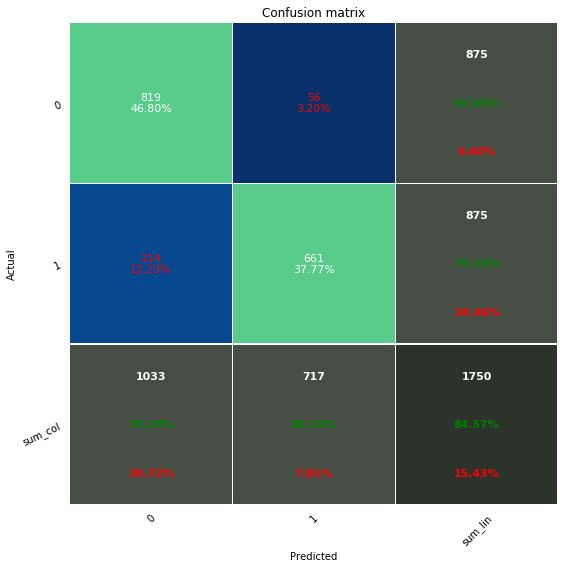

In [18]:
cmpp.pretty_plot_confusion_matrix(df_cm, cmap="Blues_r", show_null_values=1, pred_val_axis='x')

In [19]:
cm.sum(axis=1)

array([875, 875])

In [20]:
np.diag(cm)

array([819, 661])

In [21]:
cm.sum(axis=1) - np.diag(cm)

array([ 56, 214])

## When Actual = Rows and Predicted = Columns
## TP: Diagonal top left to bottom right
## TN: Values in all columns and rows excluding given Class column and row
## FP: Values in column excluding TP
## FN: Values in row excluding TP

In [22]:
TP = np.diag(cm)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TN = cm.sum() - (TP + FP + FN)

print(TP)
print(FP)
print(FN)
print(TN)

[819 661]
[214  56]
[ 56 214]
[661 819]


## Accuracy: How often correct?  _Diagonal / Total_

In [23]:
print(metrics.accuracy_score(y_test,y_pred))
print(TP.sum() / cm.sum())

0.8457142857142858
0.8457142857142858


## Classification Error: How often incorrect? _Non-Diagonal / Total_

In [24]:
print(1 - metrics.accuracy_score(y_test,y_pred))
print((cm.sum() - np.diag(cm).sum()) / cm.sum())

0.15428571428571425
0.15428571428571428


## Precision: When a positive value is predicted, how often is it correct? _TP / Column Total_

In [25]:
print(metrics.precision_score(y_test,y_pred, average=None))
print(TP / (TP + FP))

[0.7928364  0.92189679]
[0.7928364  0.92189679]


## Sensitivity (Recall or TPR): When actual value is positive, how often is prediction correct? _TP / Row Total_

In [26]:
print(metrics.recall_score(y_test,y_pred, average=None))
print(TP/(TP+FN))

[0.936      0.75542857]
[0.936      0.75542857]


## False Positive Rate FP / float(TN + FP)
=1 - Specificty

In [27]:
print(FP / (TN + FP))

[0.24457143 0.064     ]


## Specifity TN / float(TN + FP)
When the actual value is negative, how often is the prediction correct?

In [28]:
print(TN / (TN + FP))
print([1,1] - (FP / (TN + FP)))

[0.75542857 0.936     ]
[0.75542857 0.936     ]


In [29]:
metrics.matthews_corrcoef(y_test,y_pred)

0.7029843164858546

#### https://www.researchgate.net/post/Multiclass_Confusion_Matrix_Explanation

In [30]:
X_train.shape

(7000, 2351)

In [31]:
X = pd.concat([X_train,X_test], ignore_index=True)
y = pd.concat([y_train,y_test], ignore_index=True)

In [32]:
print(X.shape)
print(y.shape)

(8750, 2351)
(8750,)


In [ ]:
train_sizes = [70,700,1750,3500,5250,7000]
train_sizes, train_scores, validation_scores = learning_curve(estimator=clf,X=X, y=y, train_sizes=train_sizes, cv=5, scoring='accuracy')

In [ ]:
print(train_scores)
print(validation_scores)

In [ ]:
train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

In [ ]:
print(pd.Series(train_scores_mean, index=train_sizes))
print()
print(pd.Series(validation_scores_mean, index=train_sizes))

In [ ]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation Error')

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Decision Tree', fontsize = 18, y=1.03)
plt.legend()

In [ ]:
clf.n_neighbors = 10

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator=clf,X=X, y=y, train_sizes=train_sizes, cv=5, scoring='accuracy')

In [ ]:
train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

In [ ]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation Error')

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Decision Tree', fontsize = 18, y=1.03)
plt.legend()

In [ ]:
estimators = [x for x in range(1,51,10)]
learn_rate = [x for x in range(0,2,0.5)]

param_grid = dict(n_neighbors=k_range, weights=weight_options)

In [ ]:
grid = GridSearchCV(clf, param_grid, scoring='accuracy')

In [ ]:
grid.fit(X,y)